# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        if city_weather.get("cod") != 200:  # Check for a successful response
            print(f"Error fetching data for {city}: {city_weather.get('message')}")
            continue  # Skip to the next city

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except requests.exceptions.RequestException as e:
        print(f"Request failed for {city}: {e}")
        continue

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | pacasmayo
Processing Record 3 of Set 1 | ishpeming
Processing Record 4 of Set 1 | tolanaro
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | pariaman
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | flying fish cove
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | polyarnyy
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | taiohae
Error fetching data for taiohae: city not found
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | guarapari
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,14.33,74,0,3.94,ZA,1741666978
1,pacasmayo,-7.4006,-79.5714,23.50,76,99,5.16,PE,1741666979
2,ishpeming,46.4885,-87.6676,9.52,82,82,6.20,US,1741666980
3,tolanaro,-25.0319,46.9987,25.04,88,40,4.12,MG,1741666981
4,port-aux-francais,-49.3500,70.2167,9.18,92,99,18.07,TF,1741666983


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.33,74,0,3.94,ZA,1741666978
1,pacasmayo,-7.4006,-79.5714,23.50,76,99,5.16,PE,1741666979
2,ishpeming,46.4885,-87.6676,9.52,82,82,6.20,US,1741666980
3,tolanaro,-25.0319,46.9987,25.04,88,40,4.12,MG,1741666981
4,port-aux-francais,-49.3500,70.2167,9.18,92,99,18.07,TF,1741666983


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

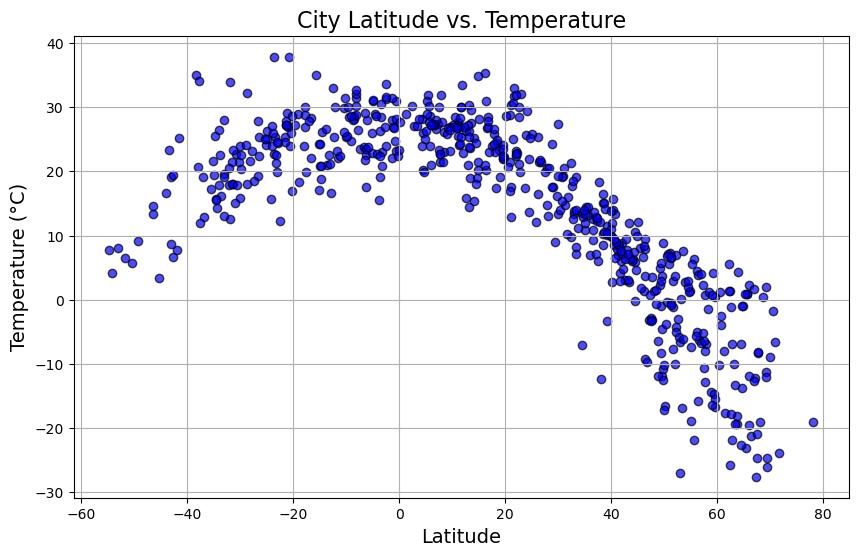

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

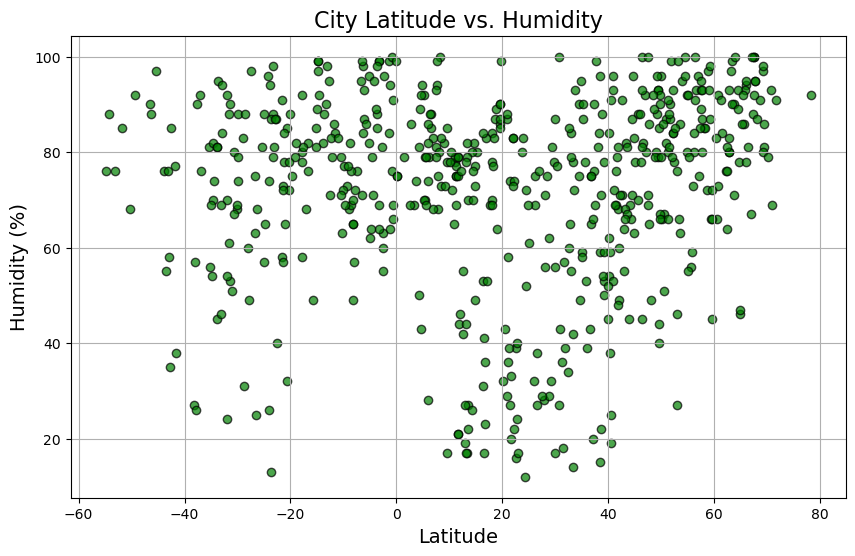

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='green', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

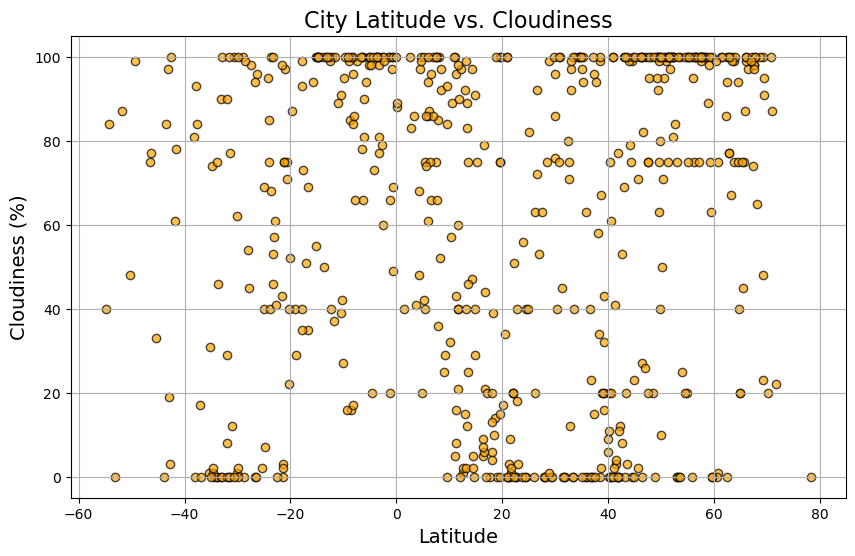

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='orange', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

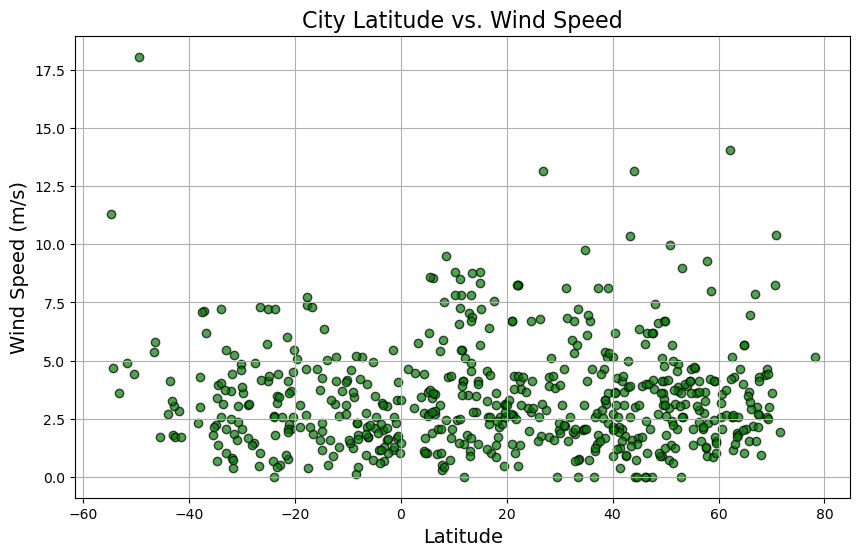

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))  
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='green', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed', fontsize=16) 
plt.xlabel('Latitude', fontsize=14)  
plt.ylabel('Wind Speed (m/s)', fontsize=14) 
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(data, x_col, y_col, title='Linear Regression Plot', x_label='X-axis', y_label='Y-axis'):
    
    # Extract x and y values
    x_values = data[x_col]
    y_values = data[y_col]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create regression line values
    regress_values = slope * x_values + intercept

    # Create the line equation string
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

    # Build scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.7)

    # Plot the regression line
    plt.plot(x_values, regress_values, color='red', linewidth=2)

    # Incorporate the other graph properties
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.grid(True)

    # Annotate the plot with the formula and R^2 value
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=18, color='red')  # Move up by increasing Y-coordinate
    plt.annotate(f'$R^2 = {round(r_value**2, 2)}$', (min(x_values), max(y_values) - 6), fontsize=18, color='black')

    # Show the plot
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ishpeming,46.4885,-87.6676,9.52,82,82,6.20,US,1741666980
7,guerrero negro,27.9769,-114.0611,14.82,71,0,4.27,MX,1741666986
11,polyarnyy,69.1989,33.4478,-11.22,97,23,4.65,RU,1741666991
12,petropavlovsk-kamchatsky,53.0452,158.6483,-6.67,27,0,9.00,RU,1741666992
16,olonkinbyen,70.9221,-8.7187,-6.62,69,87,10.42,SJ,1741666996


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.33,74,0,3.94,ZA,1741666978
1,pacasmayo,-7.4006,-79.5714,23.50,76,99,5.16,PE,1741666979
3,tolanaro,-25.0319,46.9987,25.04,88,40,4.12,MG,1741666981
4,port-aux-francais,-49.3500,70.2167,9.18,92,99,18.07,TF,1741666983
5,pariaman,-0.6190,100.1200,31.03,69,69,3.28,ID,1741666984


###  Temperature vs. Latitude Linear Regression Plot

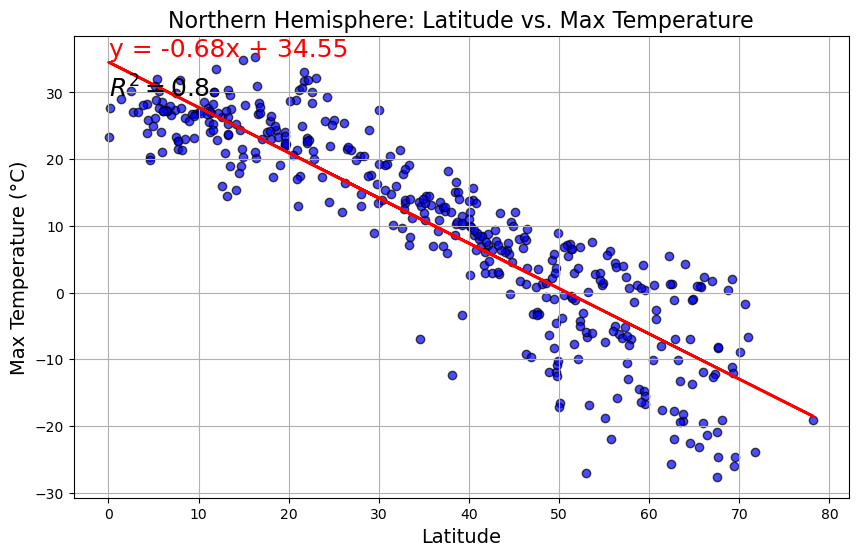

In [52]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp', 
                               title='Northern Hemisphere: Latitude vs. Max Temperature', 
                               x_label='Latitude', 
                               y_label='Max Temperature (°C)')

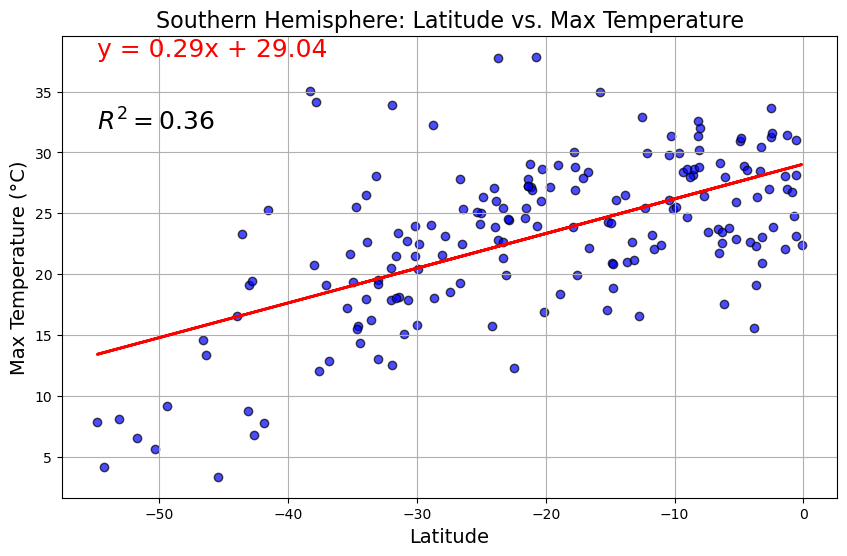

In [53]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp', 
                               title='Southern Hemisphere: Latitude vs. Max Temperature', 
                               x_label='Latitude', 
                               y_label='Max Temperature (°C)')

**Discussion about the linear relationship:**  
In the Northern Hemisphere, we typically observe that as latitude increases (moving away from the equator), the maximum temperature tends to decrease. The inverse can be said for the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

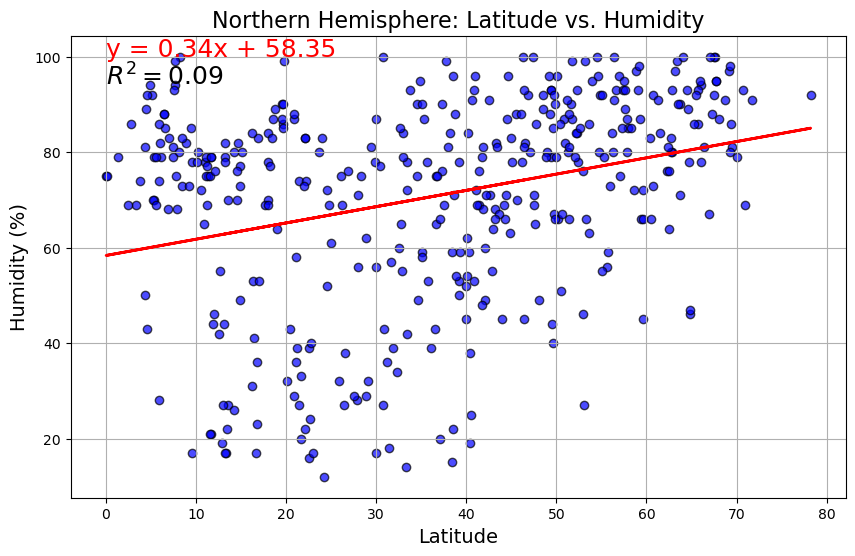

In [64]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity', 
                               title='Northern Hemisphere: Latitude vs. Humidity', 
                               x_label='Latitude', 
                               y_label='Humidity (%)')

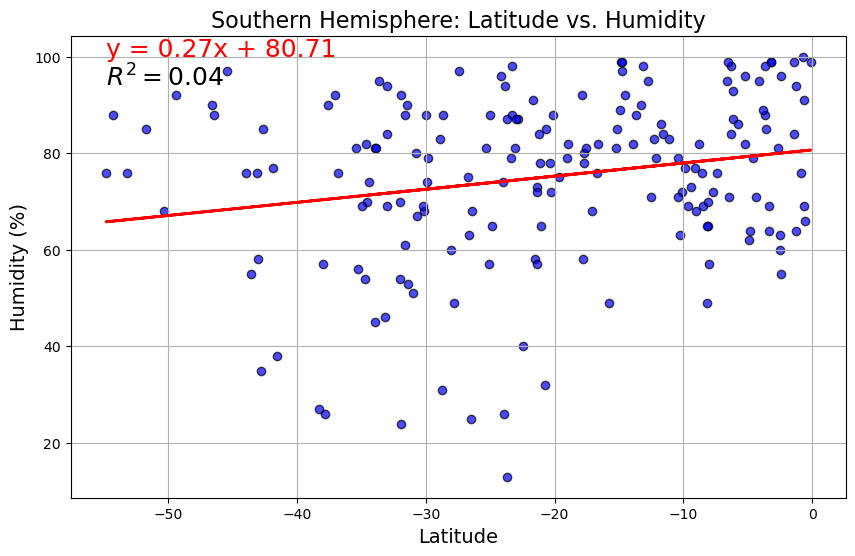

In [65]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity', 
                               title='Southern Hemisphere: Latitude vs. Humidity', 
                               x_label='Latitude', 
                               y_label='Humidity (%)')

**Discussion about the linear relationship:**
Both the North and South Hemisphere's observe a weak positive linear relationship with Latitude vs. Humidity. Despite the weak correlations (r=0.09 & r=0.04), this indicates that it generally gets more humid as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

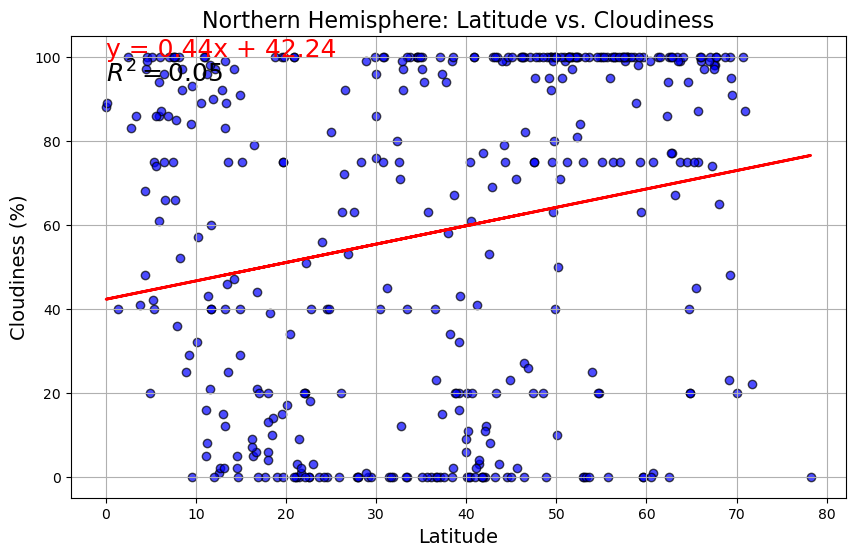

In [60]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 
                               title='Northern Hemisphere: Latitude vs. Cloudiness', 
                               x_label='Latitude', 
                               y_label='Cloudiness (%)')

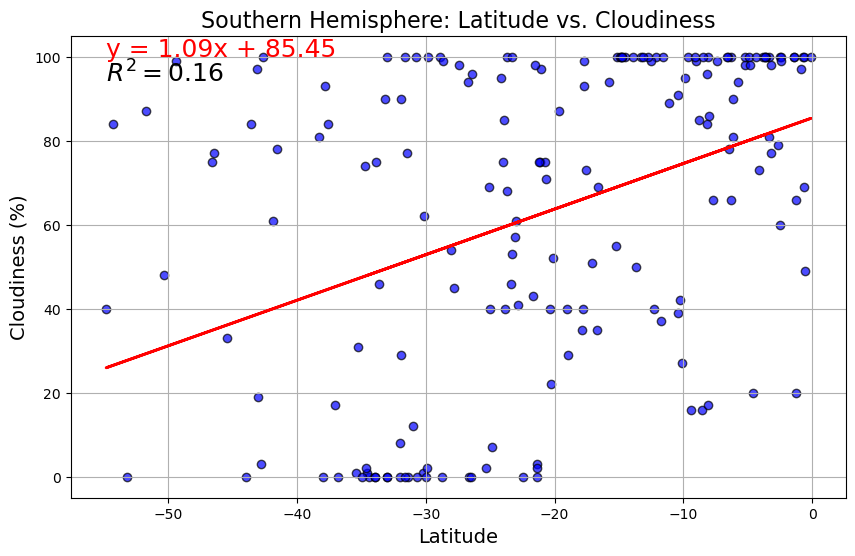

In [61]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness', 
                               title='Southern Hemisphere: Latitude vs. Cloudiness', 
                               x_label='Latitude', 
                               y_label='Cloudiness (%)')

**Discussion about the linear relationship:**
Similar to humidity, both Hemisphere's observe a weak positive linear relationship with Latitude vs. Cloudiness. Despite the weak correlations (r=0.05 & r=0.16), this indicates that it generally gets more cloudy as latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

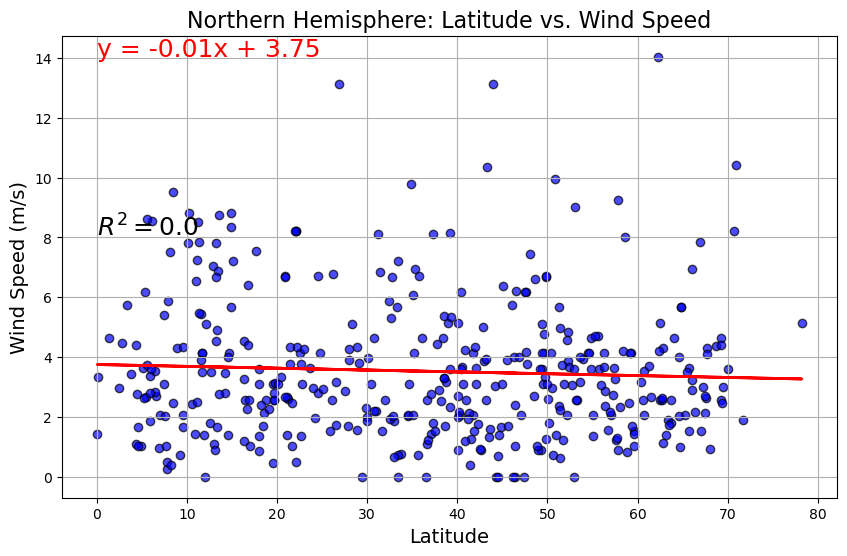

In [68]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed', 
                               title='Northern Hemisphere: Latitude vs. Wind Speed', 
                               x_label='Latitude', 
                               y_label='Wind Speed (m/s)')

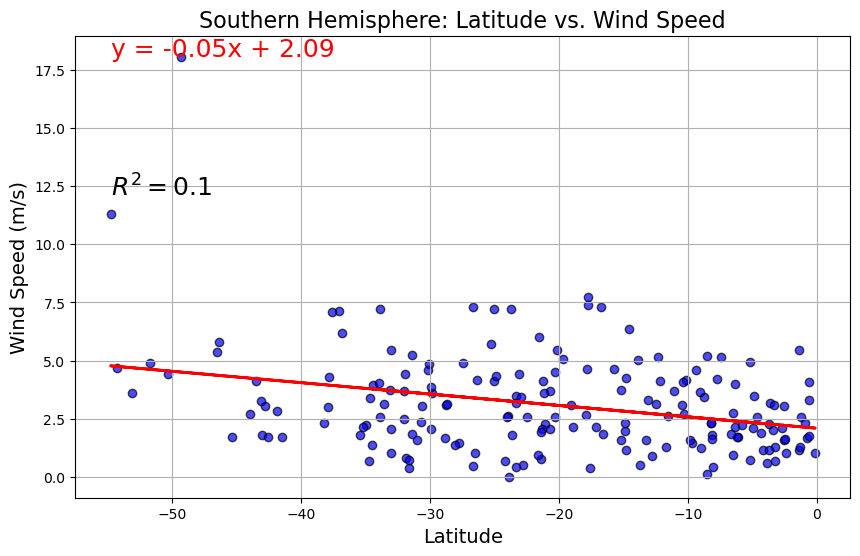

In [69]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed', 
                               title='Southern Hemisphere: Latitude vs. Wind Speed', 
                               x_label='Latitude', 
                               y_label='Wind Speed (m/s)')

**Discussion about the linear relationship:**
Both Hemisphere's observe a weak negative linear relationship with Latitude vs. Wind Speed. Despite the weak correlations (r=0.00 & r=0.1), this indicates that it generally gets less windy as latitude increases.

**Discussion about the linear relationship:** 
The weak correlation in all the relationships indicate that there is more nuance beyond latitude.